In [1]:
"""
A. For each tissue, enrichment [how likely are eSTRs to fall in TF sites]
Fisher test at each tissue
    Background: All STRs
    Forground: eSTRs that fall within TFs 

"""

# Libraries
from collections import defaultdict
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as ss
import seaborn.apionly as sns

#variables

SHORTEN = {
    "Artery-Aorta":"Artery.A"     ,
    "Artery-Tibial": "Artery.T",
    "Adipose-Subcutaneous": "Adipose.S",    
    "Adipose-Visceral(Omentum)":"Adipose.V",
    "Brain-Caudate(basalganglia)":"Caudate"   , 
    "Brain-Cerebellum":"Cerebellum",
    "Cells-Transformedfibroblasts": "Fibroblast",
    "Esophagus-Mucosa": "Mucosa",
    "Esophagus-Muscularis":"Muscularis",
    "Heart-LeftVentricle":"Ventricule",
    "Lung": "Lung",
    "Muscle-Skeletal": "Muscle",
    "Nerve-Tibial":"Nerve",
    "Skin-NotSunExposed(Suprapubic)": "SkinUnexposed",
    "Skin-SunExposed(Lowerleg)":"SkinLeg",
    "Thyroid":"Thyroid",
    "WholeBlood": "Blood"
}
TISSUES = sorted([item for item in list(SHORTEN.keys())])
regr='/storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/'
feat='/storage/szfeupe/Runs/GTEx_estr/FEATURES/Allgencodefeatures_table'
motif='/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif.bed'
strand= '/storage/resources/dbase/human/hg19/hg19.hipstr_reference_withmotif_stranded.bed'


In [21]:
#open files   ##tfbs on Lymphoblast cell line 

# Cont. Table by Tissues
TFs = '/storage/mgymrek/gtex/tfbs/enrichment/'
transfacts = os.listdir(TFs)
transfacts = [x for x in transfacts if '_tfbs_enrich.tab' in x]

# Fisher test at tissues
DATA=[]
for i in range (len(TISSUES)):
    # Data
    P=[]
    tis = TISSUES[i]
    data = pd.read_csv(TFs+tis+'_tfbs_enrich.tab', sep='\t')
    data = data.loc[data['AB']>=50]
    data[SHORTEN[tis]] = -np.log10(data['pval'])
    #pvalues in tissue
    PV = data[['category',SHORTEN[tis]]]   
    DATA.append(PV)

pdata=PV
for i in range (len(TISSUES)-1):
    pdata = pd.merge(pdata, DATA[i], on='category')

Cell = [x for x in list(pdata['category']) if 'GM12878' in x]
pdata1 = pdata.loc[pdata['category'].isin(Cell)]
Cell = [x.split('_')[0] for x in list(pdata1['category'])]
pdata1.index=Cell
del pdata1['category']
pdata1 = pdata1.sort_values('Blood')


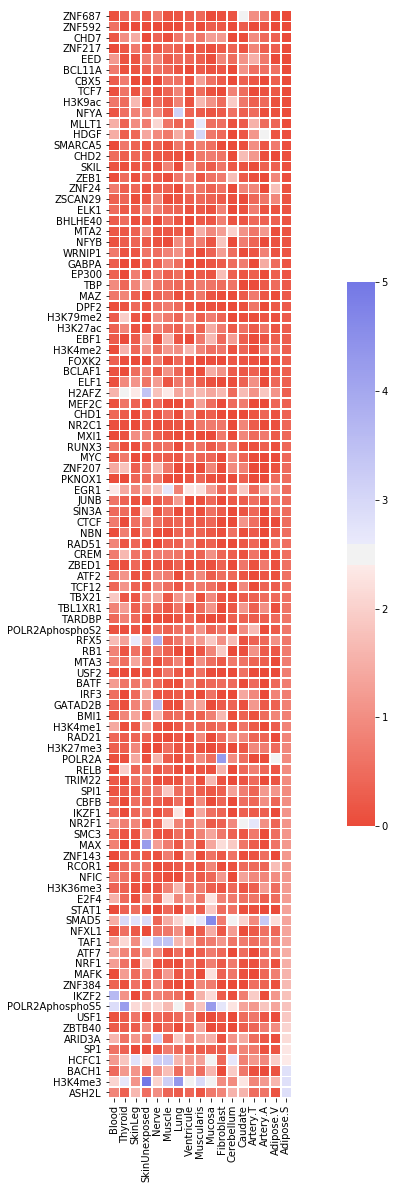

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata1, cmap=cmap,  annot_kws={"size": 5},
            vmin=0, vmax=5, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=[SHORTEN[t] for t in TISSUES], 
           yticklabels=[x for x in list(pdata1.index)])

ax.invert_xaxis()
plt.show()

(1632, 18)


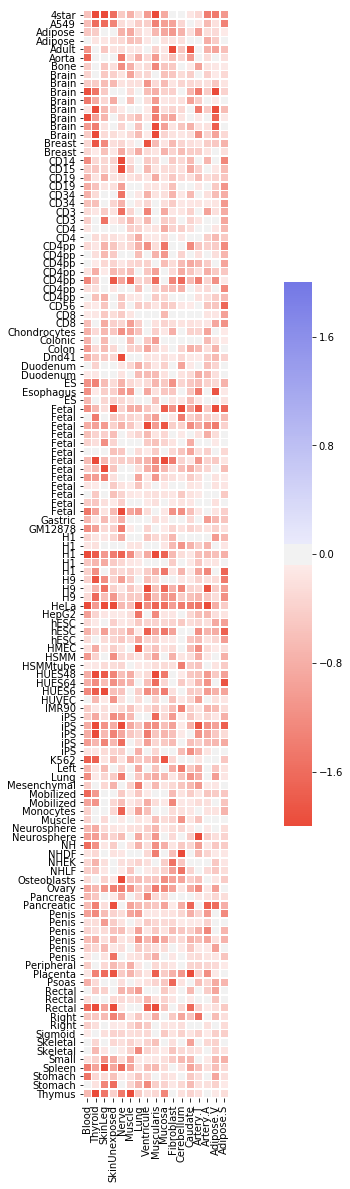

In [19]:
# On 
# Cont. Table by Tissues
TFs = '/storage/mgymrek/gtex/tfbs/enrichment/'
transfacts = os.listdir(TFs)
transfacts = [x for x in transfacts if '_roadmap_enrich.tab' in x]

# Fisher test at tissues
DATA=[]
for i in range (len(TISSUES)):
    # Data
    P=[]
    tis = TISSUES[i]
    data = pd.read_csv(TFs+tis+'_roadmap_enrich.tab', sep='\t')
    data = data.loc[data['AB']>=50]
    data[SHORTEN[tis]] = np.log10(data['pval'])
    #pvalues in tissue
    PV = data[['category',SHORTEN[tis]]]   
    DATA.append(PV)

pdata=PV
for i in range (len(TISSUES)-1):
    pdata = pd.merge(pdata, DATA[i], on='category')

Cell = [x for x in list(pdata['category']) if 'Enhancers' in x]
pdata1 = pdata.loc[pdata['category'].isin(Cell)]
Cell = [x.split('_')[0] for x in list(pdata1['category'])]
pdata1.index=Cell
del pdata1['category']
print(pdata.shape)



fig, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(15, 265, s=80, l=55, n=9, as_cmap=True)    
sns.heatmap(pdata1, cmap=cmap,  annot_kws={"size": 5},
            vmin=-2, vmax=2, square=True, ax=ax, linewidths=0.5, cbar_kws={"shrink": 0.5},
           xticklabels=[SHORTEN[t] for t in TISSUES], 
           yticklabels=[x for x in list(pdata1.index)])

ax.invert_xaxis()
plt.show()



In [ ]:
Cell lines
        GM12878 ***   
        A549       
        OCI-LY7    
        HL-60        
        NB4      